# Formula One Drivers' Performance - Predicting a Champion

## Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import math
from tqdm import tqdm
from scipy.special import expit
from scipy import stats, optimize
import random
import warnings
warnings.filterwarnings('ignore')
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [2]:
#Reading dataframe from the excel file

df = pd.read_excel("F1DriversData.xls")
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,1962,0,3,0,0,0,0,0,...,NaN,1960,0.0,0.0,0.0,0.0,0.0,0.0,2,False
1,Carlo Abate,Italy,1963,0,3,0,0,0,0,0,...,NaN,1960,0.0,0.0,0.0,0.0,0.0,0.0,2,False
2,George Abecassis,United Kingdom,1951,0,2,2,0,0,0,0,...,NaN,1950,0.0,1.0,0.0,0.0,0.0,0.0,2,False
3,George Abecassis,United Kingdom,1952,0,2,2,0,0,0,0,...,NaN,1950,0.0,1.0,0.0,0.0,0.0,0.0,2,False
4,Kenny Acheson,United Kingdom,1983,0,10,3,0,0,0,0,...,NaN,1980,0.0,0.3,0.0,0.0,0.0,0.0,2,False


## Exploratory Data Analysis

In [3]:
# Data types of all the columns in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              3181 non-null   object 
 1   Nationality         3181 non-null   object 
 2   Seasons             3181 non-null   int64  
 3   Championships       3181 non-null   int64  
 4   Race_Entries        3181 non-null   int64  
 5   Race_Starts         3181 non-null   int64  
 6   Pole_Positions      3181 non-null   int64  
 7   Race_Wins           3181 non-null   int64  
 8   Podiums             3181 non-null   int64  
 9   Fastest_Laps        3181 non-null   int64  
 10  Points              3181 non-null   float64
 11  Active              3181 non-null   bool   
 12  Championship Years  399 non-null    object 
 13  Decade              3181 non-null   int64  
 14  Pole_Rate           3181 non-null   float64
 15  Start_Rate          3181 non-null   float64
 16  Win_Ra

In [4]:
# Basic statistical information about continuous features in the data

df.describe()

,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
count,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,1976.545426,0.294247,73.545426,70.318453,4.248350,4.368752,12.618988,4.289532,186.986086,1976.667715,0.029051,0.869602,0.029309,0.093285,0.030381,1.115690,7.006916
std,20.594824,1.000092,85.484194,84.881991,11.996171,12.632299,27.064576,10.340863,508.476070,20.796088,0.069381,0.222710,0.065474,0.137044,0.062265,1.905783,4.725811
min,1950.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1958.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,0.000000,0.857143,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1973.000000,0.000000,36.000000,32.000000,0.000000,0.000000,1.000000,0.000000,11.000000,1970.000000,0.000000,0.972973,0.000000,0.018018,0.000000,0.381818,6.000000
75%,1992.000000,0.000000,113.000000,111.000000,1.000000,2.000000,12.000000,3.000000,133.000000,1990.000000,0.017316,1.000000,0.032468,0.149171,0.037500,1.424242,10.000000
max,2023.000000,7.000000,359.000000,356.000000,103.000000,103.000000,191.000000,77.000000,4415.500000,2020.000000,0.557692,1.000000,0.461538,1.000000,0.500000,14.197749,19.000000


In [5]:
# Check for null values

df.isna().sum()

Driver                   0
Nationality              0
Seasons                  0
Championships            0
Race_Entries             0
Race_Starts              0
Pole_Positions           0
Race_Wins                0
Podiums                  0
Fastest_Laps             0
Points                   0
Active                   0
Championship Years    2782
Decade                   0
Pole_Rate                0
Start_Rate               0
Win_Rate                 0
Podium_Rate              0
FastLap_Rate             0
Points_Per_Entry         0
Years_Active             0
Champion                 0
dtype: int64

In [6]:
#Check distribution and classification of target variable (Dependent Variable)

df["Champion"].value_counts()

False    2782
True      399
Name: Champion, dtype: int64

In [7]:
# Determine skewness in continuous features

skewness = df.skew()
for col in skewness.index:
    print('Skewness of {}: {:.2f}'.format(col, skewness[col]))

Skewness of Seasons: 0.54
Skewness of Championships: 4.56
Skewness of Race_Entries: 1.37
Skewness of Race_Starts: 1.42
Skewness of Pole_Positions: 4.91
Skewness of Race_Wins: 5.15
Skewness of Podiums: 3.52
Skewness of Fastest_Laps: 4.00
Skewness of Points: 4.95
Skewness of Active: 4.60
Skewness of Decade: 0.49
Skewness of Pole_Rate: 3.74
Skewness of Start_Rate: -2.44
Skewness of Win_Rate: 3.33
Skewness of Podium_Rate: 1.85
Skewness of FastLap_Rate: 3.39
Skewness of Points_Per_Entry: 3.57
Skewness of Years_Active: 0.69
Skewness of Champion: 2.26


In [8]:
# Histogram to understand distribution of Years_Active

import plotly.express as px

fig = px.histogram(df, x="Years_Active", title='Distribution of Experience in Years')
fig.show()

The data is skewed towards the left indicating there are more drivers who have a total experience between 0 to 4 years

In [9]:
# Bar chart to determine championships by country

fig = px.bar(df, x="Nationality", y="Championships", title = 'Number of championships by country')
fig.show()

UK has the highest number of championships in formula one history

In [10]:
#Scatter plot to find relationship between pole positions and podiums

fig = px.scatter(df, x="Pole_Positions", y="Podiums", color = "Champion", title= 'Relationship between Pole Positions and Podiums')
fig.show()

Drivers who had more pole postions were likely to have more podiums and hence a good chance of becoming a champion

In [11]:
# Box plot to determine how Years_Active could contribute to a championship

fig = px.box(df, x="Champion",y="Years_Active", title='Does Experience matter to become a champion?')
fig.show()

Drivers who had 10 to 15 years of experience approximately were likely to become champions

In [12]:
# Scatter plot to determine relationship between fastest laps and win rate

fig = px.scatter(df, x="Fastest_Laps", y="Win_Rate", color = "Champion", title='Relationship between Fastest Laps and Win Rate')
fig.show()

Drivers who had more than 10 fastest laps were more likely to be champions

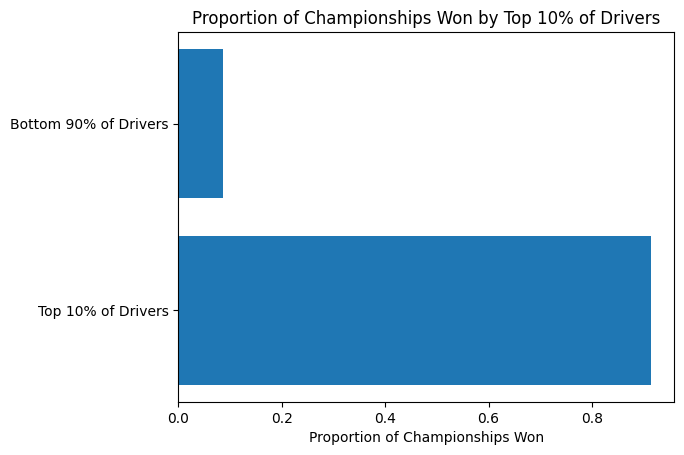

In [13]:
# Sort the data by championships won
driver_sorted = df.sort_values('Championships', ascending=False)

# Calculate the total number of championships won
total_championships = driver_sorted['Championships'].sum()

# Calculate the proportion of championships won by the top 10% of drivers
top_percent = 0.1
top_drivers = driver_sorted.head(int(len(driver_sorted) * top_percent))
top_championships = top_drivers['Championships'].sum()
proportion_top_championships = top_championships / total_championships

# Plot a Horizontal bar chart to understand the proportion of championships won
plt.barh(['Top 10% of Drivers', 'Bottom 90% of Drivers'], [proportion_top_championships, 1-proportion_top_championships])
plt.xlabel('Proportion of Championships Won')
plt.title('Proportion of Championships Won by Top 10% of Drivers')

plt.show()

The top 10.0% of drivers have won 91.35% of all championships.

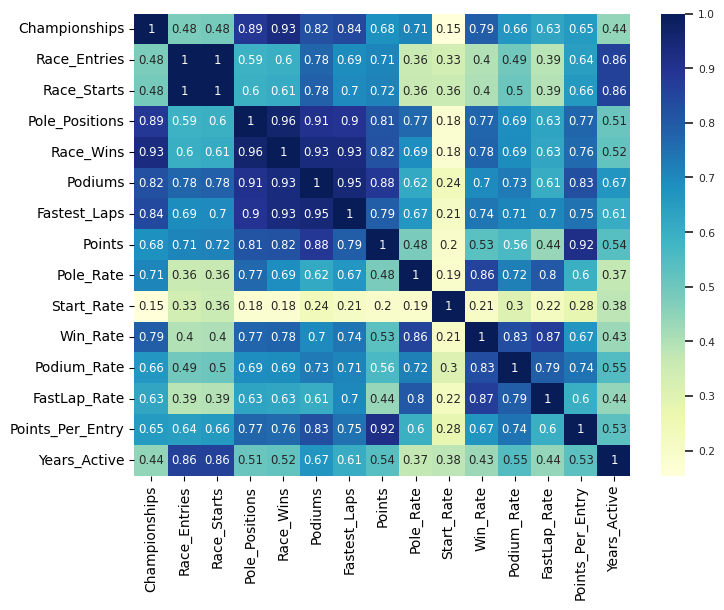

In [14]:
# Display the correlation matrix of continuous variables as a heatmap

continuous_vars = ['Championships', 'Race_Entries', 'Race_Starts', 'Pole_Positions', 'Race_Wins', 
                   'Podiums', 'Fastest_Laps', 'Points', 'Pole_Rate', 'Start_Rate', 'Win_Rate', 
                   'Podium_Rate', 'FastLap_Rate', 'Points_Per_Entry', 'Years_Active']

corr_matrix = np.corrcoef(df[continuous_vars].T)

fig, ax = plt.subplots(figsize=(8, 6))

sns.set(font_scale=0.7)
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', xticklabels=continuous_vars, yticklabels=continuous_vars, ax=ax)
plt.show()

A strong correlation is determined by values that are either closer to +1 or -1

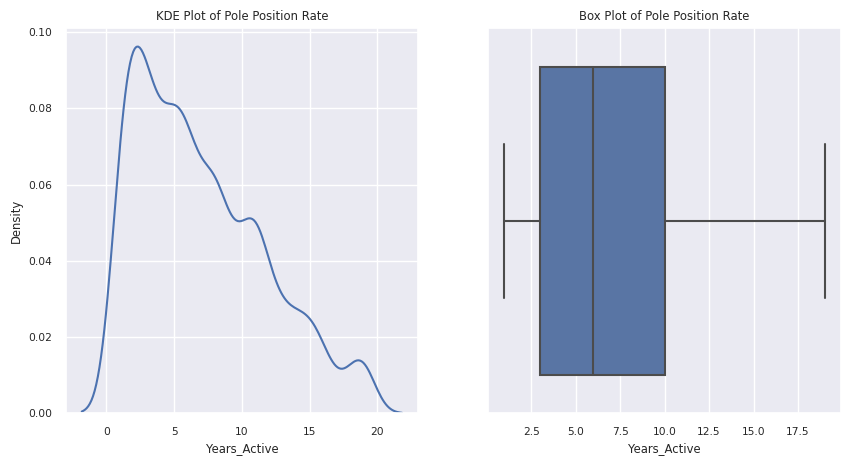

In [15]:
#Create plots to understand distribution of Years_Active

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# create a KDE plot in the first subplot
sns.kdeplot(data=df, x="Years_Active", ax=axs[0])
axs[0].set_title("KDE Plot of Pole Position Rate")

# create a box plot in the second subplot
sns.boxplot(data=df, x="Years_Active", ax=axs[1])
axs[1].set_title("Box Plot of Pole Position Rate")

# display the plot
plt.show()

The mean of Years Active (Drivers' Experience) is approxiamtely 6 years

In [16]:
# Scatter plot to indicate relationship between race wins and pole positions

fig = px.scatter(df, x="Race_Wins", y="Pole_Positions", color="Champion", title = "Relationship between Race Wins and Pole Positions")
fig.show()

Drivers who had more pole positions were likely to win the race

## Data Pre-processing and Transformations

### 1. Standard Pre-processing

In [17]:
# Dataset Cleaning and Pre-processing

df['Seasons'] = df['Seasons'].astype(str)
df['Seasons'] = df['Seasons'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
df['Seasons'] = df['Seasons'].str.split(', ')

# create a new dataframe with each season in its own row
new_df = pd.DataFrame({
    'Driver': df['Driver'].repeat(df['Seasons'].apply(len)),
    'Nationality': df['Nationality'].repeat(df['Seasons'].apply(len)),
    'Season': [season.strip() for seasons in df['Seasons'] for season in seasons],
    'Championships': df['Championships'].repeat(df['Seasons'].apply(len)),
    'Race_Entries': df['Race_Entries'].repeat(df['Seasons'].apply(len)),
    'Race_Starts': df['Race_Starts'].repeat(df['Seasons'].apply(len)),
    'Pole_Positions': df['Pole_Positions'].repeat(df['Seasons'].apply(len)),
    'Race_Wins': df['Race_Wins'].repeat(df['Seasons'].apply(len)),
    'Podiums': df['Podiums'].repeat(df['Seasons'].apply(len)),
    'Fastest_Laps': df['Fastest_Laps'].repeat(df['Seasons'].apply(len)),
    'Championship Years': df['Championship Years'].repeat(df['Seasons'].apply(len)),
    'Decade': df['Decade'].repeat(df['Seasons'].apply(len)),
    'Pole_Rate': df['Pole_Rate'].repeat(df['Seasons'].apply(len)),
    'Start_Rate': df['Start_Rate'].repeat(df['Seasons'].apply(len)),
    'Win_Rate': df['Win_Rate'].repeat(df['Seasons'].apply(len)),
    'Podium_Rate': df['Podium_Rate'].repeat(df['Seasons'].apply(len)),
    'FastLap_Rate': df['FastLap_Rate'].repeat(df['Seasons'].apply(len)),
    'Points_Per_Entry': df['Points_Per_Entry'].repeat(df['Seasons'].apply(len)),
    'Years_Active': df['Years_Active'].repeat(df['Seasons'].apply(len)),
    'Champion': df['Champion'].repeat(df['Seasons'].apply(len)),
})

# write the new dataframe to a csv file
new_df.to_csv('F1updated_filenew.csv', index=False)

In [18]:
# Load your data into a pandas DataFrame
data = pd.read_csv('F1updated_filenew.csv')
data["Champion"]=data["Champion"].astype(int)
data.head()

,Driver,Nationality,Season,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,1962,0,3,0,0,0,0,0,NaN,1960,0.0,0.0,0.0,0.0,0.0,0.0,2,0
1,Carlo Abate,Italy,1963,0,3,0,0,0,0,0,NaN,1960,0.0,0.0,0.0,0.0,0.0,0.0,2,0
2,George Abecassis,United Kingdom,1951,0,2,2,0,0,0,0,NaN,1950,0.0,1.0,0.0,0.0,0.0,0.0,2,0
3,George Abecassis,United Kingdom,1952,0,2,2,0,0,0,0,NaN,1950,0.0,1.0,0.0,0.0,0.0,0.0,2,0
4,Kenny Acheson,United Kingdom,1983,0,10,3,0,0,0,0,NaN,1980,0.0,0.3,0.0,0.0,0.0,0.0,2,0


In [19]:
# Dropping Championship Years and Championships as they do not convey useful information

data=data.drop("Championship Years",axis=1)
data=data.drop("Championships",axis=1)
data.head()

,Driver,Nationality,Season,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,1962,3,0,0,0,0,0,1960,0.0,0.0,0.0,0.0,0.0,0.0,2,0
1,Carlo Abate,Italy,1963,3,0,0,0,0,0,1960,0.0,0.0,0.0,0.0,0.0,0.0,2,0
2,George Abecassis,United Kingdom,1951,2,2,0,0,0,0,1950,0.0,1.0,0.0,0.0,0.0,0.0,2,0
3,George Abecassis,United Kingdom,1952,2,2,0,0,0,0,1950,0.0,1.0,0.0,0.0,0.0,0.0,2,0
4,Kenny Acheson,United Kingdom,1983,10,3,0,0,0,0,1980,0.0,0.3,0.0,0.0,0.0,0.0,2,0


### 2. SMOTE

In [20]:
# Using SMOTE we balance out the True and False values in the Champion feature

# Separate the features and target variable
X = data.drop(columns=['Champion'])
y = data['Champion']

# Apply ordinal encoding to categorical features
ordinal_cols = ['Driver', 'Nationality', 'Decade']
ordinal_encoder = OrdinalEncoder()
X[ordinal_cols] = ordinal_encoder.fit_transform(X[ordinal_cols])

# Scale continuous features
numeric_cols = ['Season', 'Race_Entries', 'Race_Starts', 
                'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps', 'Points_Per_Entry',
                'Pole_Rate', 'Start_Rate', 'Win_Rate', 'Podium_Rate',
                'FastLap_Rate', 'Points_Per_Entry', 'Years_Active']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Print the number of samples in each class before and after SMOTE
print('Number of samples in each class before SMOTE:\n', y_train.value_counts())
print('Number of samples in each class after SMOTE:\n', y_resampled.value_counts())

Number of samples in each class before SMOTE:
 0    1946
1     280
Name: Champion, dtype: int64
Number of samples in each class after SMOTE:
 0    1946
1    1946
Name: Champion, dtype: int64


### 3. Principal Component Analysis

Cumulative PCA Variance : [0.99436941 0.99941201 0.99979401 0.99991088 0.99993909 0.99995846
 0.99997222 0.99998229 0.99999044 0.99999471 0.99999733 0.99999837
 0.99999904 0.99999956 0.99999998 1.        ]




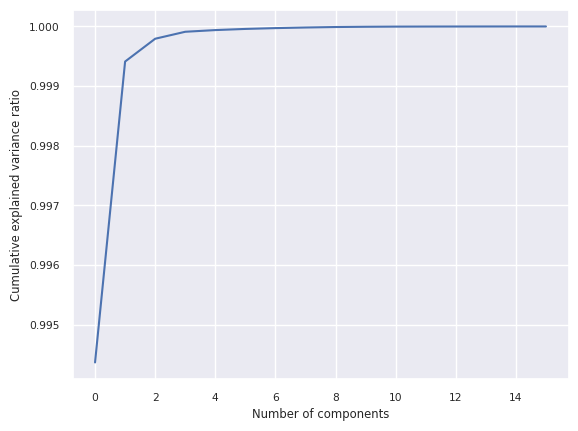

In [21]:
#Apply PCA to the smote dataset

from sklearn.decomposition import PCA
pc = PCA(n_components=16)
principalComponents = pc.fit_transform(X_resampled.iloc[:,:-1]) #Fit transform

print('Cumulative PCA Variance :', np.cumsum(pc.explained_variance_ratio_))# Cumulative variance
print('\n')

principalDf = pd.DataFrame(data = principalComponents,
             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                        'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'])

y_resampled_df = pd.DataFrame(y_resampled, columns=['Champion'])
df_pca_final = pd.concat([principalDf, y_resampled_df], axis = 1)

plt.plot(np.cumsum(pc.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

In [22]:
from sklearn.decomposition import PCA

# Apply PCA to the resampled training data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_resampled)

# Combine the PCA components with the target variable
pca_df = pd.DataFrame(data=X_pca, columns=['PC{}'.format(i) for i in range(1, 11)])
pca_df['Champion'] = y_resampled.values

# View the first few rows of the PCA data with the target variable attached
print(pca_df.head())


          PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  169.681046 -15.572245 -4.223166  1.050537 -0.056401  1.549158 -0.451221   
1 -365.410211   9.542497 -4.688968  0.678440 -0.369120  1.428407  0.022850   
2 -286.453234  21.800868 -5.419524  0.983663 -0.382058  1.242739  0.590954   
3  175.645977  -5.551220 -4.495558  0.981997 -0.399666  0.970480 -0.050602   
4 -390.384436   3.634371 -1.643912 -3.073142 -0.737472 -1.306841 -0.473433   

        PC8       PC9      PC10  Champion  
0  0.537667  0.863609  0.004107         0  
1  0.199484  0.398764 -0.375745         0  
2 -0.260296 -0.895497 -0.595801         0  
3 -0.063202 -0.062650 -0.146663         0  
4 -0.853984  0.463997 -0.171243         0  


In [23]:
# Apply PCA to the test data

from sklearn.decomposition import PCA

X_test_pca = pca.transform(X_test)

# Combine the PCA components with the target variable
pca_test_df = pd.DataFrame(data=X_test_pca, columns=['PC{}'.format(i) for i in range(1, 11)])
pca_test_df['Champion'] = y_test.values

# View the first few rows of the PCA test data with the target variable attached
print(pca_test_df.head())


          PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  118.684349 -16.749602 -3.907241  1.892390 -0.879334  0.952416  0.394608   
1  282.589814  12.026861 -1.108489  0.101315 -0.546972 -0.482112 -0.662793   
2 -204.442467  20.307978 -1.104241 -0.432823 -0.649699 -0.284031  0.574436   
3  257.588355  11.814084 -4.088451 -1.375639  0.857137  0.201695 -0.224720   
4  315.583975  11.886639 -5.834703  2.049363 -0.993578  1.084910  0.561973   

        PC8       PC9      PC10  Champion  
0  0.505362  0.468798  0.397554         0  
1 -0.844980  0.558820 -0.337959         0  
2  0.046874  0.005103  0.681930         1  
3 -0.343144 -0.676210  0.156769         0  
4 -0.323252 -0.758779 -0.403052         0  


## Model Building

### 1. Naïve Bayes

In [24]:
# Fit Gaussian Naive Bayes classifier on the resampled dataset

from sklearn.naive_bayes import GaussianNB

accuracies = {}
# Fit Gaussian Naive Bayes classifier on the resampled training set
gnb = GaussianNB(priors=None, var_smoothing=1.0) 
gnb.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Print number of mislabeled points
print("Number of mislabeled points out of a total %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

# Calculate accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
accuracies['Naive Bayes'] = round(accuracy,2)
print("Accuracy of Gaussian Naive Bayes model on test set = ", round(accuracy,2), "%")

Number of mislabeled points out of a total 955 points: 605
Accuracy of Gaussian Naive Bayes model on test set =  36.65 %


In [25]:
# Calculate MAE, MSE, RMSE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = GaussianNB(priors=None, var_smoothing=1.0)
model.fit(X_resampled, y_resampled)
pred = model.predict (X_test)
pred_train = model.predict (X_train)
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred, squared = False))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, pred, squared = False)))

MAE:  0.6335078534031413
MSE:  0.7959320658216638
RMSE:  0.892150248456875


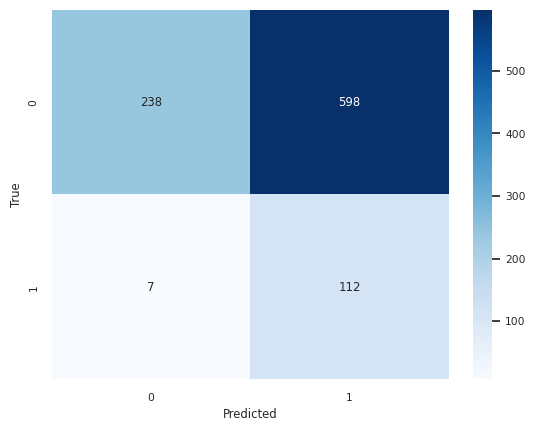

In [26]:
# Compute confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.show()

In [27]:
# Fit Gaussian Naive Bayes classifier on the Original dataset
gnb = GaussianNB(priors=None, var_smoothing=1.0) 
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Print number of mislabeled points
print("Number of mislabeled points out of a total %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

# Calculate accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
accuracies['Naive Bayes Resampled'] = round(accuracy,2)
print("Accuracy of Gaussian Naive Bayes model on test set = ", round(accuracy,2), "%")

Number of mislabeled points out of a total 955 points: 119
Accuracy of Gaussian Naive Bayes model on test set =  87.54 %


In [28]:
# Calculate MAE, MSE, RMSE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = GaussianNB(priors=None, var_smoothing=1.0)
model.fit(X_train, y_train)
pred = model.predict (X_test)
pred_train = model.predict (X_train)
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred, squared = False))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, pred, squared = False)))

MAE:  0.12460732984293194
MSE:  0.35299763433050363
RMSE:  0.5941360402555156


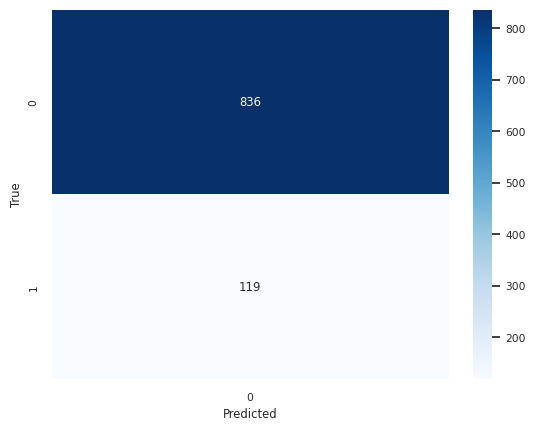

In [29]:
# Compute confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.show()


In [30]:
# Print classification report with precision, recall, and F1 score
pred_resampled_train = model.predict(X_resampled)
pred_train_conv = pd.Series(pred_resampled_train).to_frame().astype(int)

print(classification_report(y_resampled, pred_train_conv, target_names=["True", "False"]))

              precision    recall  f1-score   support

        True       0.50      1.00      0.67      1946
       False       0.00      0.00      0.00      1946

    accuracy                           0.50      3892
   macro avg       0.25      0.50      0.33      3892
weighted avg       0.25      0.50      0.33      3892



### 2. Logistic Regression

In [31]:
# Import Logistic regression from sci-kit learn library

from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

lr.fit(X_resampled, y_resampled)
predicted = lr.predict(X_test)

In [36]:
# Calculate Accuracy for Original Dataset 
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predicted) # Accuracy Score
print("Accuracy of logistic regression model on original dataset = "+str(round(score*100,2))+"%")

Accuracy of logistic regression model on original dataset = 92.04%


In [34]:
# Performance Evaulation MAE,MSE and RMSE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict (X_test)
pred_train = model.predict (X_train)
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred, squared = False))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, pred, squared = False)))

MAE:  0.03769633507853403
MSE:  0.19415544050717207
RMSE:  0.440630730325487


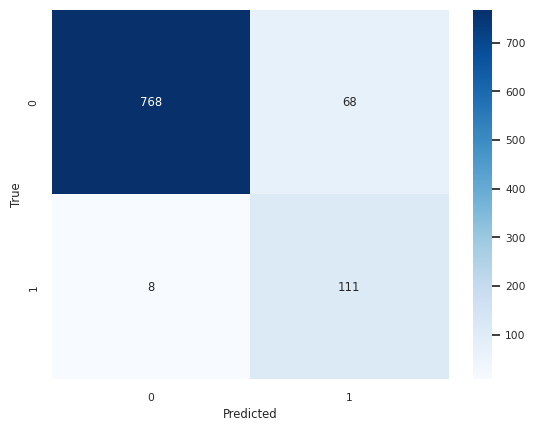

In [43]:
# Compute confusion matrix
confusion_matrix = pd.crosstab(y_test, predicted, rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.show()

In [35]:
# Import Logistic regression from sci-kit learn library

from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

lr.fit(X_resampled, y_resampled)
predicted_smote = lr.predict(X_test)

In [37]:
# Calculate Accuracy for Resampled Dataset 

score = accuracy_score(y_test, predicted_smote) # Accuracy Score
accuracies['Logistic Regression'] = round(score*100,2)
print("Accuracy of logistic regression model on smote dataset = "+str(round(score*100,2))+"%")

Accuracy of logistic regression model on smote dataset = 92.04%


In [40]:
# Performance Evaulation MAE,MSE and RMSE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
pred = model.predict(X_test)
pred_train = model.predict (X_resampled)
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred, squared = False))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, pred, squared = False)))

MAE:  0.07958115183246073
MSE:  0.2821013148364621
RMSE:  0.5311321067648445


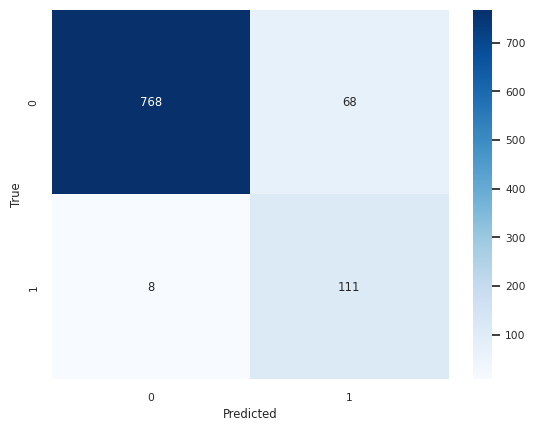

In [42]:
# Compute confusion matrix
confusion_matrix = pd.crosstab(y_test, predicted_smote, rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.show()

### 3. K-Nearest Neighbors 

In [44]:
# Initialise KNN Model

from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}

for k in range(2, 21):
	clf = KNeighborsClassifier(n_neighbors = k)
	clf.fit(X_resampled, y_resampled)

	training_score = clf.score(X_resampled, y_resampled)
	test_score = clf.score(X_test, y_test)
	K.append(k)

	training.append(training_score)
	test.append(test_score)
	scores[k] = [training_score, test_score]

In [45]:
# Checking Accuracy by checking each K value

from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors=k)
    
    clf.fit(X_resampled, y_resampled)

    training_score = clf.score(X_resampled, y_resampled)
    test_score = clf.score(X_test, y_test)
    
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
print("K values:", K)
print("Training accuracy scores:", training)
print("Test accuracy scores:", test)

print("Accuracy scores for each K value:")
for k, score in scores.items():
  print(f"K={k}: Training accuracy={score[0]}, Test accuracy={score[1]}")


K values: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Training accuracy scores: [1.0, 0.9992291880781089, 0.9992291880781089, 0.9971736896197327, 0.9971736896197327, 0.9956320657759506, 0.9953751284686536, 0.9933196300102775, 0.9933196300102775, 0.9910071942446043, 0.9910071942446043, 0.987410071942446, 0.987410071942446, 0.9850976361767728, 0.9850976361767728, 0.9784172661870504, 0.9784172661870504, 0.9745632065775951, 0.9745632065775951]
Test accuracy scores: [1.0, 0.993717277486911, 0.993717277486911, 0.9884816753926702, 0.9884816753926702, 0.9863874345549738, 0.9863874345549738, 0.9832460732984293, 0.9832460732984293, 0.9769633507853404, 0.9769633507853404, 0.9727748691099476, 0.9727748691099476, 0.9643979057591623, 0.9643979057591623, 0.9528795811518325, 0.9528795811518325, 0.9486910994764398, 0.9486910994764398]
Accuracy scores for each K value:
K=2: Training accuracy=1.0, Test accuracy=1.0
K=3: Training accuracy=0.9992291880781089, Test accuracy=0.993717

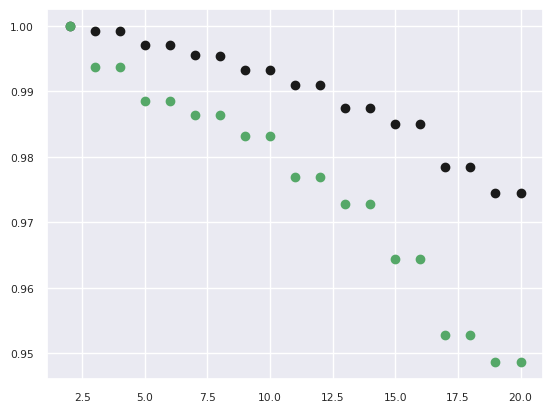

In [46]:
# Measuring Training and Test Accuracies

plt.scatter(x=K,y= training, color ='k')
plt.scatter(x=K, y=test, color ='g')
plt.show()

In [47]:
#Performance Evaulation MAE,MSE and RMSE

pred_test = clf.predict(X_test)
pred_resampled = clf.predict(X_resampled)
print('MAE (test):', mean_absolute_error(y_test, pred_test))
print('MSE (resampled):', mean_squared_error(y_resampled, pred_resampled, squared=False))
print('RMSE (resampled):', math.sqrt(mean_squared_error(y_resampled, pred_resampled, squared=False)))

MAE (test): 0.05130890052356021
MSE (resampled): 0.15948916396547114
RMSE (resampled): 0.39936094446687087


In [48]:
# Make predictions on the resampled training set
pred_resampled_train = clf.predict(X_resampled)
pred_train_conv = pd.Series(pred_resampled_train).to_frame().astype(int)

# Calculate accuracy of the model
accuracy_train = metrics.accuracy_score(y_resampled, pred_train_conv) * 100
accuracies['KNN'] = round(accuracy_train,2)
print("Accuracy of KNN model on resampled dataset = ", accuracy_train, "%")


Accuracy of KNN model on resampled dataset =  97.4563206577595 %


In [49]:
# Print classification report with precision, recall, and F1 score

print(classification_report(y_resampled, pred_train_conv, target_names=["positive", "negative"]))

              precision    recall  f1-score   support

    positive       1.00      0.95      0.97      1946
    negative       0.95      1.00      0.98      1946

    accuracy                           0.97      3892
   macro avg       0.98      0.97      0.97      3892
weighted avg       0.98      0.97      0.97      3892



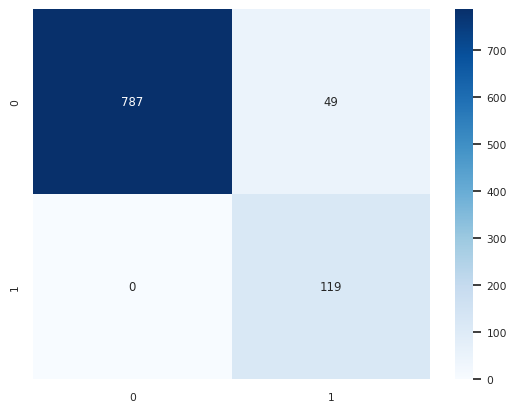

In [53]:
#Compute Confusion Matrix
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, cmap='Blues', fmt='g')
plt.show()

### 4. Neural Networks

In [54]:
#Define Neural Network Model and run on Training Dataset

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a MLP classifier object
model_NN = MLPClassifier(max_iter=800, learning_rate_init=0.003, activation='relu', random_state=42)

# Train the MLP classifier on the resampled data
model_NN.fit(X_train, y_train)

# Make predictions on the original test set
y_pred = model_NN.predict(X_test)

# Calculate accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9801047120418848


In [55]:
# Performance Evaulation MAE,MSE and RMSE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict (X_test)
pred_train = model.predict (X_train)
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred, squared = False))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, pred, squared = False)))

MAE:  0.03769633507853403
MSE:  0.19415544050717207
RMSE:  0.440630730325487


In [56]:
#Define Neural Network Model and run on Test Dataset

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a MLP classifier object
model_NN = MLPClassifier(max_iter=800, learning_rate_init=0.003, activation='relu', random_state=42)

# Train the MLP classifier on the resampled data
model_NN.fit(X_resampled, y_resampled)

# Make predictions on the original test set
y_pred = model_NN.predict(X_test)

# Calculate accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
accuracies['Neural Network'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy Score: 0.9832460732984293


In [58]:
# Performance Evaulation MAE,MSE and RMSE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
pred = model.predict (X_test)
pred_train = model.predict (X_resampled)
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred, squared = False))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, pred, squared = False)))

MAE:  0.07958115183246073
MSE:  0.2821013148364621
RMSE:  0.5311321067648445


In [59]:
#Classification Report for SMOTE Dataset

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       836
           1       0.91      0.97      0.93       119

    accuracy                           0.98       955
   macro avg       0.95      0.98      0.96       955
weighted avg       0.98      0.98      0.98       955



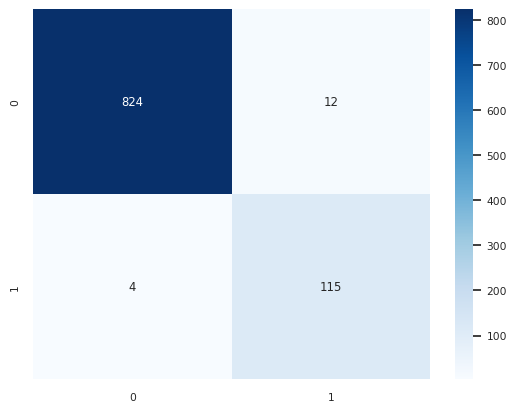

In [60]:
#Compute Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

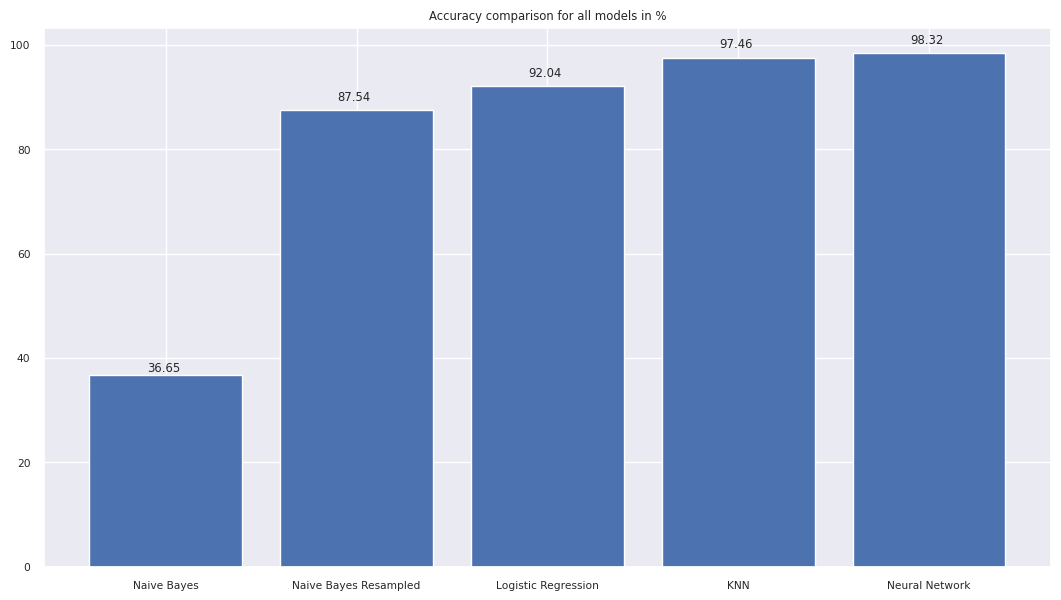

In [61]:
# Create Accuracy Comparison to choose the best predicting model

names = list(accuracies.keys())
values = list(accuracies.values())
plt.figure(figsize = (13,7))
plt.title('Accuracy comparison for all models in %')
barplot = plt.bar(range(len(accuracies)), values, tick_label=names)
for i, bar in enumerate(barplot):
  plt.text(bar.get_x() + bar.get_width()/2-0.1,bar.get_height()*1.02, s = values[i])
plt.show()

From the above visualization, we can infer that the Neural Network Data Mining model gives us the best accuracy at classifying the Champion feature in our dataset

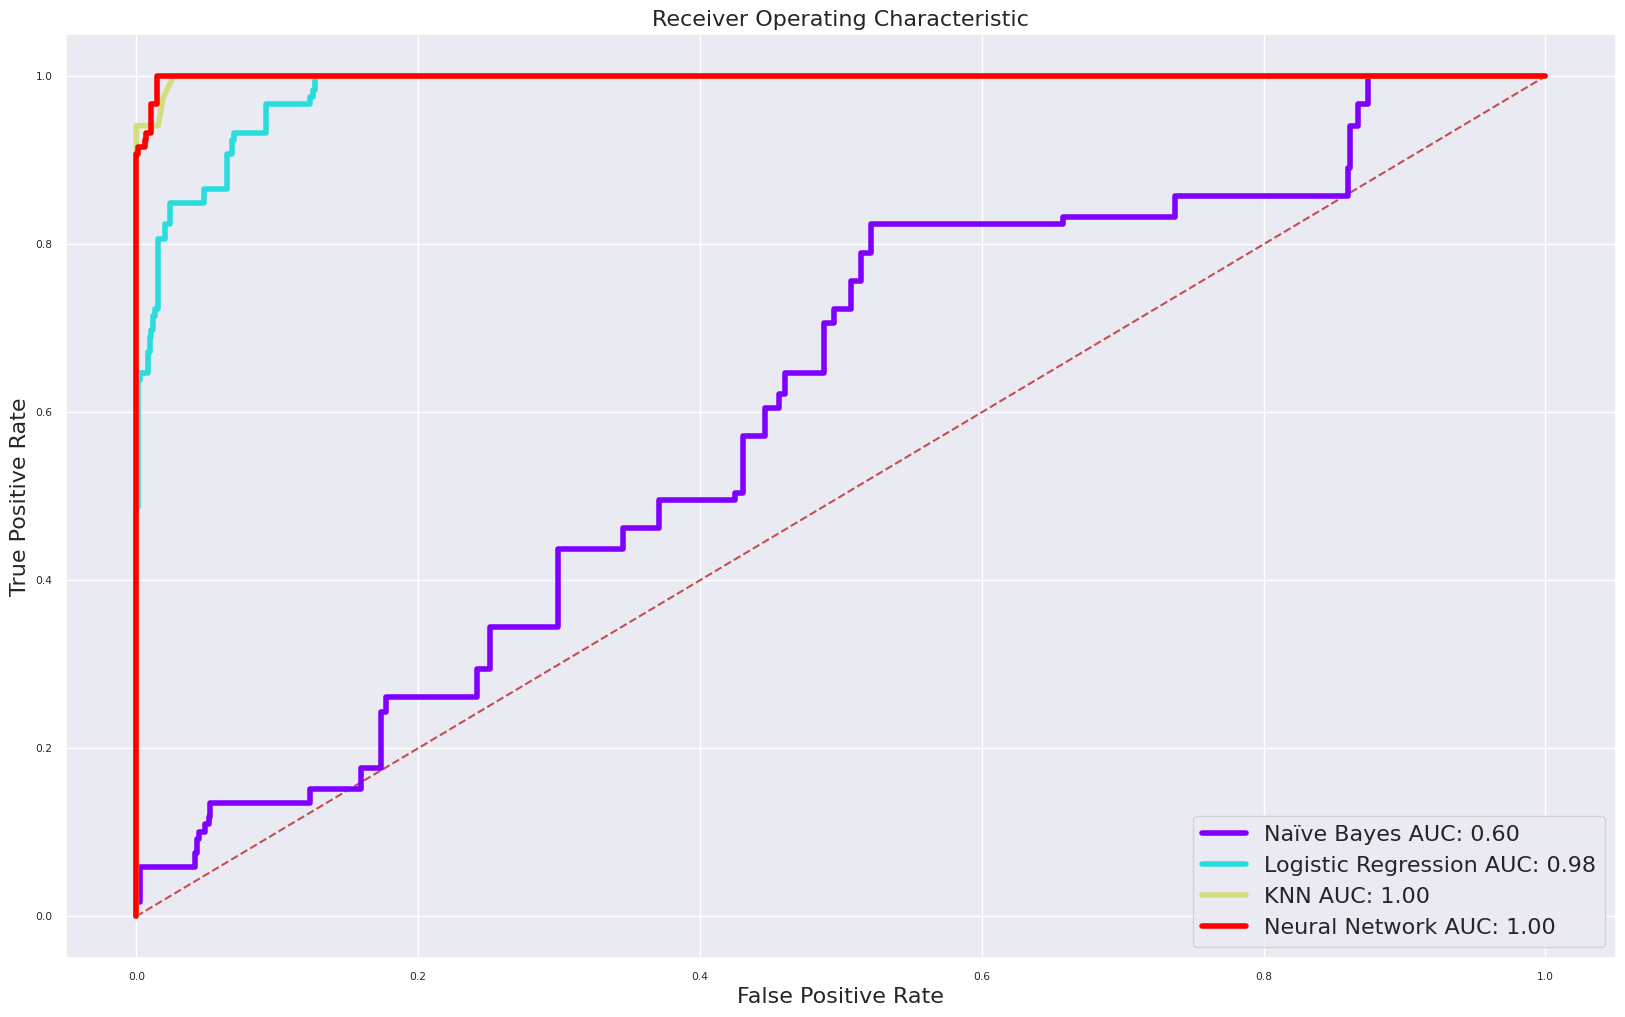

In [62]:
# Calculate ROC Curve

from matplotlib.cm import rainbow
from sklearn.metrics import roc_curve, auc

models = {}
models['Naïve Bayes'] = gnb
models['Logistic Regression'] = lr
models['KNN'] = clf
models['Neural Network'] = model_NN

names = list(models.keys())
values = list(models.values())
colors = rainbow(np.linspace(0, 1, len(models)))
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')
for i in range(len(models)):
    value = values[i]
    probs = value.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

From the above ROC Curve we can validate that the Neural Network model can classify the champion feature very accurately.